## Hotspot trends over time on Census Tract

In [ ]:
df = pd.read_parquet("outputs/hotspots_per_fips_rolling.parquet")

In [ ]:
trends_df = (
    df.groupby("GEOID")[
        [
            "time",
            "ws",
            "hw",
            "hp",
            "hs",
            "hwp",
            "hws",
            "hwps",
            "wfday",
            "hs5",
            "hws5",
            "ws5",
            "heatday",
            "coldday",
            "polluted",
            "smoke_pm_non_zero",
            "smoke_pm_gt_five",
        ]
    ]
    .resample("Y", on="time")
    .sum()
)

In [ ]:
trends_df.head()

ws  hw  hp  hs  hwp  hws  hwps  wfday  hs5  hws5  ws5  \
GEOID      time                                                                
6001400100 2006-12-31   0   0   0   1    0    0    35      0    0     0    0   
           2007-12-31   0   0   0   0    0    0    25      0    0     0    0   
           2008-12-31   0   0   0   8    0    0    73      0    4     0    0   
           2009-12-31   0   0   0   4    0    0    34      0    2     0    0   
           2010-12-31   0   0   0   2    0    0    29      0    0     0    0   

                       heatday  coldday  polluted  smoke_pm_non_zero  \
GEOID      time                                                        
6001400100 2006-12-31       15       19         0                 20   
           2007-12-31       12       23         0                 13   
           2008-12-31       24       12         2                 47   
           2009-12-31       22       17         0                 12   
           2010-12-31       18       11         0                 11   

                       smoke_pm_gt_five  
GEOID      time                          
6001400100 2006-12-31                 2  
           2007-12-31                 3  
           2008-12-31                23  
           2009-12-31                 4  
           2010-12-31                 0

In [ ]:
%load_ext lab_black

In [ ]:
import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_hotspopt_dict()

In [ ]:
trends_df = trends_df.reset_index()

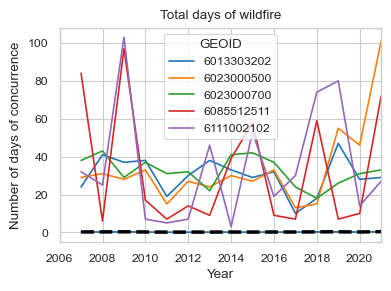

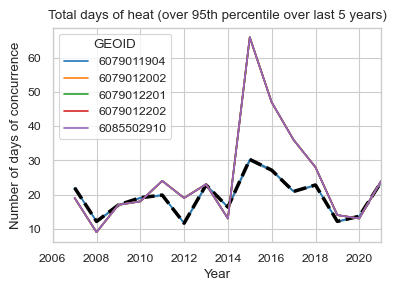

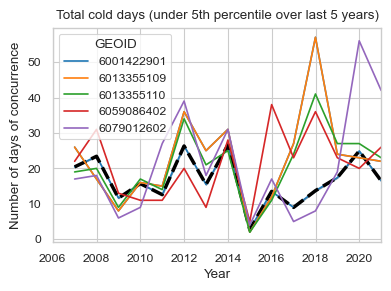

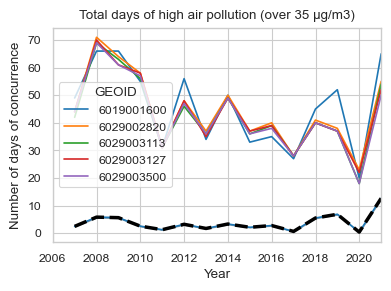

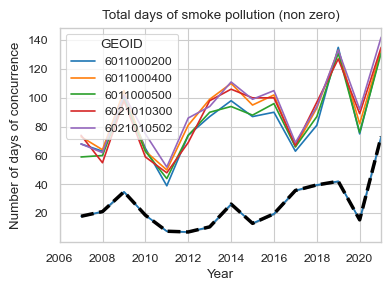

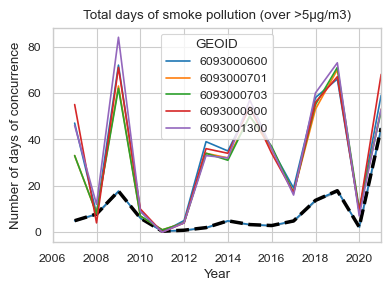

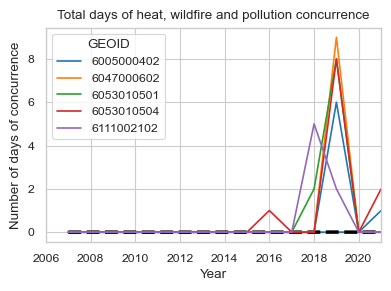

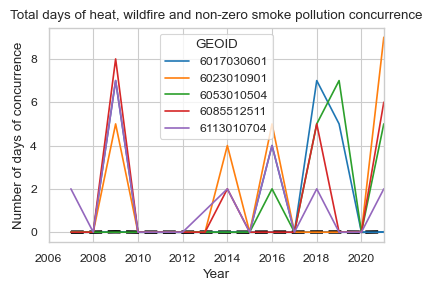

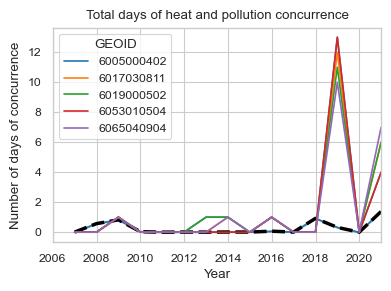

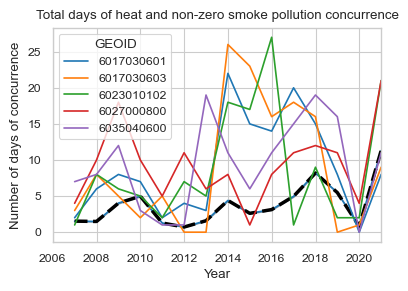

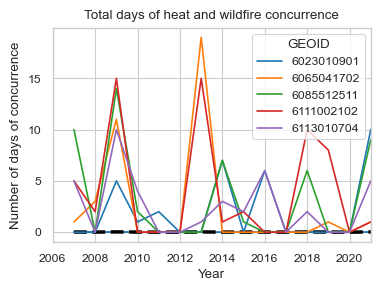

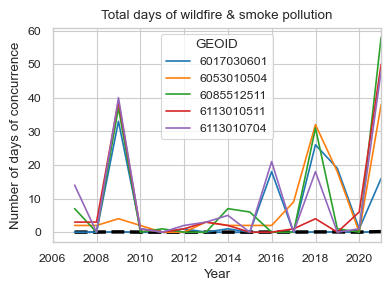

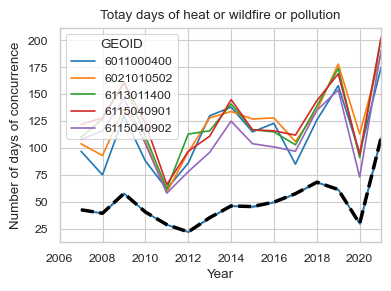

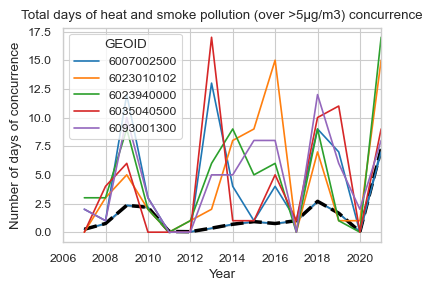

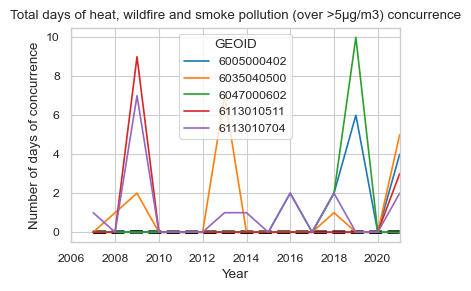

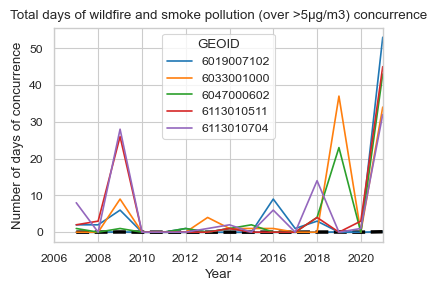

In [ ]:
for x in hs_dict.keys():
    l = trends_df.groupby("GEOID")[x].sum().sort_values().tail(5).index

    plotting.trend_plot(trends_df, l, x, hs_dict[x]["title"], hs_dict[x]["title_map"])